<a href="https://colab.research.google.com/github/dolmani38/papers/blob/main/FR_Train_A_Mutual_Information_Based_Approach_to_Fair_and_Robust_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FR-Train: A Mutual Information-Based Approach to Fair and Robust Training

https://arxiv.org/abs/2002.10234


https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

## 본 논문 선정 사유
+ 준비 논문의 주제를 수정했음.
+ Drift에 내구성이 있는 학습 방법을 연구하고자 함.
+ 즉, 학습 과정에서 Train data-set 내에 함유되어 있는 Drift의 내용과 양상을 파악하고 이를 학습과정에 포함 시켜서
+ 학습 시점의 성능이 아닌, 향후 Drift의 발생에 대한 내구성을 포함하여 Drift가 발생해도
+ 성능 감소가 상대적으로 작은 학습 기법 (알고리즘)을 연구하고자 함.
+ 이러한 취지에서 본 논문은 어떻게 Drift-resilient learning methods 을 구현할지 insigjt를 주었다고 생각함.

## Abstract

+ Trustworthy AI is a critical issue in machine learning where, in addition to training a model that is accurate, one must consider <b>both fair and robust training in the presence of data bias and poisoning.</b>
+ To address this problem, we propose FR-Train, which holistically performs <b>fair and robust model training. </b>
+ FR-Train shows almost no decrease in fairness and accuracy in the presence of data poisoning by both <b>mitigating the bias and defending against poisoning.</b>

## 1. Introduction

+ Trustworthy AI is becoming increasingly critical. In addition to simply training accurate models, there is an urgent need to address multiple requirements including fairness, robustness, explainability, transparency,
and accountability altogether (IBM, 2020).
+ 의도하는 주제는 "robustness" 한 train에 해당 할 것.
+ Traditionally, model fairness research (Venkatasubramanian,
2019; Chouldechova & Roth, 2018; Verma & Rubin, 2018)
has focused on developing metrics such as <b>disparate impact
(Feldman et al., 2015), equalized odds (Hardt et al.,
2016), and equal opportunity (Hardt et al., 2016), </b> which capture
various notions of discrimination.
+ More recently, there
has been a surge in unfairness mitigation techniques (Bellamy
et al., 2018b), which improve the model fairness by
either <b>fixing the training data, training process, or trained
model.</b>
+Our main contribution is an integrated solution called
FR-Train, which trains accurate models that are also <b>fair
and robust to poisoning.</b>
+ 어떤 현상이 data적으로 drift를 포함 한다면, 이는 Train data-set에도 어떻게든 일부 포함 되어 있을 것이고, (작은 세포에 생물의 모든 정보가 DNA 담겨져 있듯이...)
+ 이는 본 논문에서 얘기하는 poisoning 에 해당한다고 볼 수 있다. 
+ drift in train dataset = poisoning in train dataset
+ Unfairness mitigation usually involves some tradeoff between the model’s accuracy and fairness. 
+ 상기 tradeoff는 GAN의 구조에서 병합의 과정으로 생각할 수 있다.
+ FR-Train extends a state-of-the-art fairness-only method called Adversarial Debiasing (AD) (Zhang et al., 2018a), which consists of a generator used for classification and a discriminator that distinguishes predictions from one sensitive group against others, similar to GANs (Goodfellow et al., 2014). The discriminator ensures that the prediction ^y is independent of the sensitive
attribute z. 
+ 이 논문의 저자는 "AI Fairness 360: An Extensible Toolkit for Detecting, Understanding, and Mitigating Unwanted Algorithmic Bias" 여기서 착안함.

## 3. FR-Train

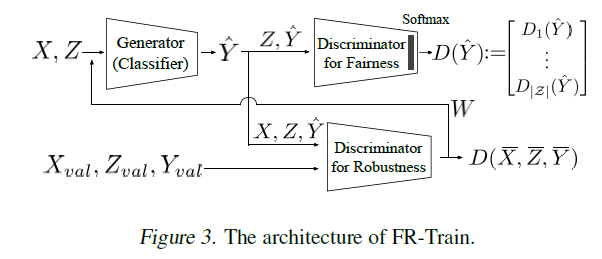

### 3.1. Fairness

+ we focus on <b>disparate impact</b>, leaving
in the supplementary our formulation and experimental results
for equalized odds and equal opportunity.
+ $ \{( x^{(i)},z^{(i)}, y^{(i)}) \}^m _{i=1} $, where $x^{(i)}$ contains the
non-sensitive attributes, $z^{(i)}$ contains the sensitive attributes,
and $y^{(i)}$ is the label.

+ <b>Disparate impact</b> aims for the <b>same positive prediction ratio</b> for each sensitive attribute $z ∈ Z $  where Z is the set of possible
sensitive attribute values.


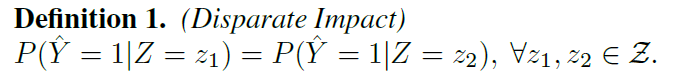

+ The discriminator for fairness in FR-Train distinguishes predictions
w.r.t. one sensitive group from those in the others. 
+ Disparate impact intends the sensitive attribute to be independent of
the model’s prediction, i.e., $I(Z;\hat{Y}) = 0$.

+ 즉, discriminator for fairness 는 $I(Z;\hat{Y})$을 minimize 하게 학습한다. --> <b>쫌 헤깔림....</b>
+ I(Z;Y^) 는 어찌어찌 해서 다음과 같이 나타낸다.

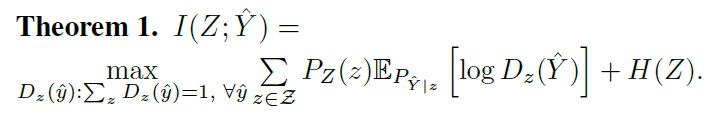

### 3.2. Robustness

+ The robustness discriminator ensures robust training by using
mutual information to distinguish examples and predictions
from a clean validation set.
+ The discriminator then distinguishes
the training data with predictions $ \{( x^{(i)},z^{(i)}, \hat{y}^{(i)}) \}^m _{i=1} $ from the validation set $ \{( x_{val}^{(i)},z_{val}^{(i)}, y_{val}^{(i)}) \}^{m_{val}} _{i=1} $
+ 만약에, training dataset이 poisoning 되어 있다면, classifier는 $\hat{y}$를 헤깔려 할 거고, 그렇다면, $y_{val}$ 과 차이가 날 것이다. 
+ Here, note that V
is an indicator random variable that denotes whether an
example is generated (V = 1) or comes from the validation
set (V = 0).
+ We then want to ensure that the distribution
of $(X,Z,\hat{Y} )$ matches that of $(X_{val},Z_{val},Y_{val})$. This can be
done by enforcing $I(V;\bar{X},\bar{Z},\bar{Y}) = 0$, i.e., the predictions
on the training data are indistinguishable from the labels
of the validation set.

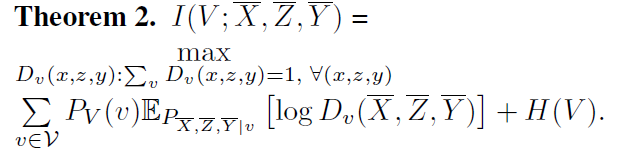

### 3.3. Architecture

 + For the loss function of the generator, we employ cross entropy:

$$
\begin{align}
L_1= \dfrac{1}{m} \sum_{i=1}^{m} -y^{(i)} log \hat{y}^{(i)} - (1 - y^{(i)})log(1-\hat{y}^{(i)}) 
\end{align}
$$

+ We set the loss function w.r.t. the fairness discriminator as:

$$
\begin{align}
L_2=  \max_{D(.)} \sum_{z \in Z} \sum_{i:z^{(i)}=z}  \dfrac{1}{m} log D_z(\hat{y}^{(i)}) + H(Z) 
\end{align}
$$

+ Finally, implementing $I(V ;\bar{X},\bar{Z},\bar{Y})$, we set the loss function
w.r.t. the robustness discriminator as:

$$
\begin{align}
L_3=  \max_{D^r(.)} \sum_{i:v^{(i)}=0}  \dfrac{1}{m} log D^r(x_{val}^{(i)},z_{val}^{(i)},y_{val}^{(i)}) + \sum_{i:v^{(i)}=1}  \dfrac{1}{m} log( 1- D^r(x^{(i)},z^{(i)},\hat{y}_{val}^{(i)}) ) + H(Z)
\end{align}
$$

+ The final objective function is the weighted sum of these
value functions:

$$
\begin{align}
\min_{G(.)} L_1 + λ_1 L_2 + λ_2 L_3
\end{align}
$$

## 4. Experiments

### 4.1. Synthetic Data Results

+ Table 1. Accuracy and fairness performances on the synthetic test
datasets w.r.t. disparate impact (DI). Two types of methods are compared:
(1) fairness methods: FC (Zafar et al., 2017), LBC (Jiang
& Nachum, 2020), and AD (Zhang et al., 2018a) where “RML+”
denotes the application of sanitization using RML (Ren et al.,
2018) beforehand; (2) non-fairness methods: LR and RML. For
FR-Train and RML, the validation set is 10% of Dtr. The amount
of poisoning is 10% of Dtr. For each result of the poisoned data,
we make a comparison with the clean data result and show the
percentage increase or decrease.

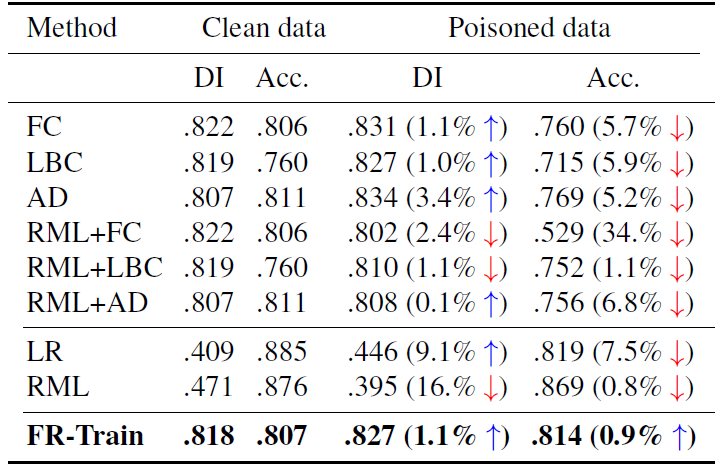

+ poisoned data에서 Acc가 괜찮으나, RML (However, (Ren et al., 2018)
is a state-of-the-art robust training method based on meta
learning using a clean validation set, which we call RML.
For a fair comparison, we thus extend the three fairness
methods by first performing RML and then utilizing the
example weights in the fairness training in a straightforward
fashion. In addition, we compare with non-fairness methods:
logistic regression (LR) and RML.) 보다는 떨어짐...

+ RML (Ren et al., 2018) --> 이것을 꼭 읽어봐야 할 듯!!!

### 4.2. Real Data Results

+ pass

## 6. Conclusion

+ We proposed FR-Train, which is a holistic framework for
trustworthy AI by performing both unfairness mitigation
and robust training.
+ In our experiments, we
showed that existing fairness methods are vulnerable to data
poisoning, even when combined with data sanitization.
+ In
comparison, FR-Train is robust to the poisoning and can be
adjusted to maintain reasonable accuracy and fairness even
if the validation set is too small or unavailable.

## 7. 이어서 읽어야 할 논문


+ Bellamy, R. K. E., Dey, K., Hind, M., Hoffman, S. C.,
Houde, S., Kannan, K., Lohia, P., Martino, J., Mehta,
S., Mojsilovic, A., Nagar, S., Ramamurthy, K. N.,
Richards, J., Saha, D., Sattigeri, P., Singh, M., Varshney,
K. R., and Zhang, Y. AI Fairness 360: An extensible
toolkit for detecting, understanding, and mitigating
unwanted algorithmic bias, October 2018a. URL
https://arxiv.org/abs/1810.01943.

+ Ren, M., Zeng, W., Yang, B., and Urtasun, R. Learning to
reweight examples for robust deep learning. In ICML, pp.
4331–4340, 2018.